# Classification experiments with Word2Vec vectorization

## Contents:
* imports & dataset initialization
* Single classification sample
* Serial classification experiments (8 Experiments)
* Training pretrained Word2Vec - ???

**Dataset:** top 250 best films + top 400 popular films + low-rating films (Complete dataset)

**Dataset shape:** $(90646, 2)$

**Reviews:** depends on experiment

In [1]:
%cd ../..

C:\Users\Yaroslav Pristalov\Documents\Programming\nlp-coursework


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dill

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer, WhitespaceTokenizer
import nltk

from pprint import pprint

from src.nlp.embeddings import corp2vecs

np.set_printoptions(threshold=np.inf)

data.shape=(90646, 2)
POSITIVE    69219
NEUTRAL     11579
NEGATIVE     9848
Name: label, dtype: int64


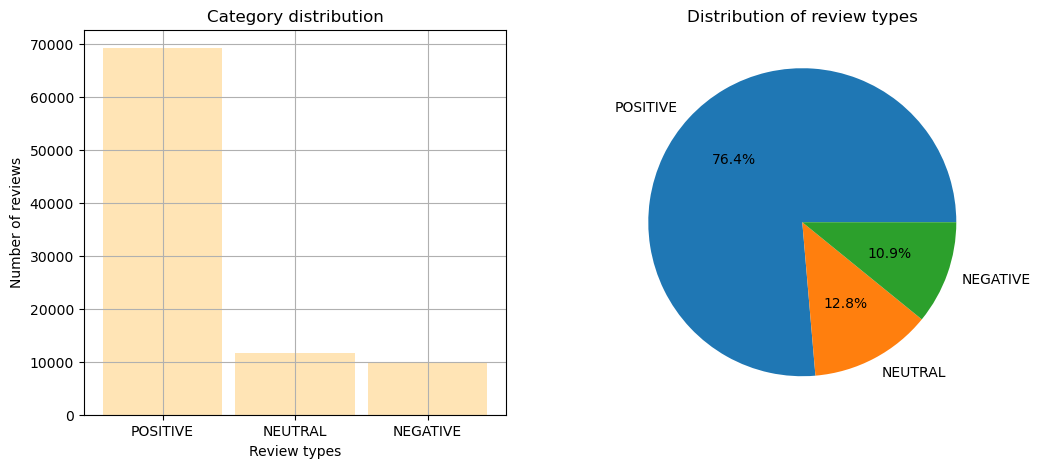

(55346, 2) (23721, 2)


,review,label
54700,фильм стоить выходить предел великобритания . ...,0
67873,это самый впечатляющий по-настоящему жуткий фи...,2
44030,первый часть ' чужой ' свой время произвести в...,2
21503,история начинающий барабанщик эндрю зародиться...,2
75163,< b > дождаться . прокат выйти новый кинолента...,2
...,...,...
6265,"весь равный мера свойственно злорадствовать , ...",0
54886,"неординарный фильм . , уверить — книга всё чёт...",2
76820,"сильно заинтересованный ' дэдпул ' , однако уз...",2
860,"фильм , который неизменно занимать первый мест...",2


In [3]:
# Open dataset
with open('reviews_Review_Label_razdel_nltk.df', 'rb') as f:
    data = dill.load(f)
print(f'{data.shape=}')
print(data.label.value_counts())

# Basic visual
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(data.label.value_counts().index, 
       data.label.value_counts().values, 
       color = 'moccasin', width = 0.9)
ax[0].set_title("Category distribution")
ax[0].set_xlabel("Review types")
ax[0].set_ylabel("Number of reviews")
ax[0].grid(True)

ax[1].pie(data.label.value_counts(), labels=data.label.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribution of review types')

plt.show()

# Basic preprocessing
label_encoding = {
    'POSITIVE': 2,
    'NEUTRAL': 1,
    'NEGATIVE': 0
}

data.label = data.label.apply(lambda label: label_encoding[label])
data = data[data.label != 1].reset_index().drop(columns=['index'])
train, test = train_test_split(data, test_size=0.3, random_state=42)

print(train.shape, test.shape)
train

## Single classification sample

In [9]:
EMB_SIZE = 300

model, X_train = corp2vecs(train.review, EMB_SIZE, train=True)
_, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(classification_report(test.label, pred))

Turning documents to lists of tokens...
Training NEW gensim.Word2Vec model on given documents...
Vectorizing each document...
Vectorization finished!
Turning documents to lists of tokens...
Provided with pretrained Word2Vec model. Training skipped.
Vectorizing each document...
Vectorization finished!
              precision    recall  f1-score   support

           0       0.78      0.55      0.64      2979
           2       0.94      0.98      0.96     20742

    accuracy                           0.92     23721
   macro avg       0.86      0.76      0.80     23721
weighted avg       0.92      0.92      0.92     23721



---

## Serial classification experiments

### Experiment 1

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`nltk`, `spacy`, custom_list]

**Model:** `LogisticRegression`

**EMB_SIZE** $ = 300$

In [4]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate(['fictitious', 'stopwords', 'list']):        
        i_to_sw_name = {0: 'nltk', 1: 'spacy', 2: 'third_party_nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        label_encoding = {
            'POSITIVE': 2,
            'NEUTRAL': 1,
            'NEGATIVE': 0
        }

        data.label = data.label.apply(lambda label: label_encoding[label])
        data = data[data.label != 1].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)

        
        EMB_SIZE = 300

        model, X_train = corp2vecs(train.review, EMB_SIZE, train=True)
        _, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

        clf = LogisticRegression(max_iter=200, n_jobs=-1)
        clf.fit(X_train, train.label)
        pred = clf.predict(X_test)

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.87      0.80      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_spacy.df'
_tokenizer='razdel', stopwords=spacy
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.80      0.60      0.69      2979
           2       0.94     

### Experiment 2

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`nltk`, `spacy`, custom_list]

**Model:** `LogisticRegression`

**EMB_SIZE** $ = 5000$

In [5]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate(['fictitious', 'stopwords', 'list']):        
        i_to_sw_name = {0: 'nltk', 1: 'spacy', 2: 'third_party_nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        label_encoding = {
            'POSITIVE': 2,
            'NEUTRAL': 1,
            'NEGATIVE': 0
        }

        data.label = data.label.apply(lambda label: label_encoding[label])
        data = data[data.label != 1].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)

        
        EMB_SIZE = 5000

        model, X_train = corp2vecs(train.review, EMB_SIZE, train=True)
        _, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

        clf = LogisticRegression(max_iter=200, n_jobs=-1)
        clf.fit(X_train, train.label)
        pred = clf.predict(X_test)

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.84     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_spacy.df'
_tokenizer='razdel', stopwords=spacy
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      2979
           2       0.94     

KeyboardInterrupt: 

### Experiment 3

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`nltk`, `spacy`, custom_list]

**Model:** `LogisticRegression`

**EMB_SIZE** $ = [100, 300, 500, 700]$

In [ ]:
for EMB_SIZE in (100, 300, 500, 700, 50000):
    for _tokenizer in ['razdel', 'rutokenizer']:
        for i, _stopwords in enumerate(['fictitious', 'stopwords', 'list']):        
            i_to_sw_name = {0: 'nltk', 1: 'spacy', 2: 'third_party_nltk'}

            with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
                data = dill.load(file)
                print(f"Data was loaded from '{file.name}'")

            print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}, {EMB_SIZE=}')
            print(f'{data.shape=}\n')

            # Basic preprocessing
            label_encoding = {
                'POSITIVE': 2,
                'NEUTRAL': 1,
                'NEGATIVE': 0
            }

            data.label = data.label.apply(lambda label: label_encoding[label])
            data = data[data.label != 1].reset_index().drop(columns=['index'])
            train, test = train_test_split(data, test_size=0.3, random_state=42)

            model, X_train = corp2vecs(train.review, EMB_SIZE, train=True)
            _, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

            clf = LogisticRegression(max_iter=200, n_jobs=-1)
            clf.fit(X_train, train.label)
            pred = clf.predict(X_test)

            print(classification_report(test.label, pred))

            print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk, EMB_SIZE=100
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.77      0.56      0.65      2979
           2       0.94      0.98      0.96     20742

    accuracy                           0.92     23721
   macro avg       0.86      0.77      0.80     23721
weighted avg       0.92      0.92      0.92     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_spacy.df'
_tokenizer='razdel', stopwords=spacy, EMB_SIZE=100
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.77      0.54      0.64      2979


Data was loaded from 'reviews_Review_Label_razdel_spacy.df'
_tokenizer='razdel', stopwords=spacy, EMB_SIZE=500
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.79      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_third_party_nltk.df'
_tokenizer='razdel', stopwords=third_party_nltk, EMB_SIZE=500
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.82      0

### Experiment 4

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`nltk`, `spacy`, custom_list]

**Model:** `LogisticRegression`

**EMB_SIZE =** $ 300$

**class_weight =** 'balanced'

In [5]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate(['fictitious', 'stopwords', 'list']):        
        i_to_sw_name = {0: 'nltk', 1: 'spacy', 2: 'third_party_nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        label_encoding = {
            'POSITIVE': 2,
            'NEUTRAL': 1,
            'NEGATIVE': 0
        }

        data.label = data.label.apply(lambda label: label_encoding[label])
        data = data[data.label != 1].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)

        
        EMB_SIZE = 300

        model, X_train = corp2vecs(train.review, EMB_SIZE, train=True)
        _, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

        clf = LogisticRegression(max_iter=200, n_jobs=-1, class_weight='balanced')
        clf.fit(X_train, train.label)
        pred = clf.predict(X_test)

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.53      0.89      0.67      2979
           2       0.98      0.89      0.93     20742

    accuracy                           0.89     23721
   macro avg       0.76      0.89      0.80     23721
weighted avg       0.93      0.89      0.90     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_spacy.df'
_tokenizer='razdel', stopwords=spacy
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.52      0.89      0.66      2979
           2       0.98     

### Experiment 5

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`nltk`, `spacy`, custom_list]

**Model:** `LogisticRegression`

**EMB_SIZE** $ = 300$

**solver =** 'saga'

In [9]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate(['fictitious', 'stopwords', 'list']):        
        i_to_sw_name = {0: 'nltk', 1: 'spacy', 2: 'third_party_nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        label_encoding = {
            'POSITIVE': 2,
            'NEUTRAL': 1,
            'NEGATIVE': 0
        }

        data.label = data.label.apply(lambda label: label_encoding[label])
        data = data[data.label != 1].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)

        
        EMB_SIZE = 300

        model, X_train = corp2vecs(train.review, EMB_SIZE, train=True)
        _, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

        clf = LogisticRegression(max_iter=200, n_jobs=-1, solver='saga')
        clf.fit(X_train, train.label)
        pred = clf.predict(X_test)

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.84     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_spacy.df'
_tokenizer='razdel', stopwords=spacy
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.60      0.69      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.87      0.79      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_third_party_nltk.df'
_tokenizer='razdel', stopwords=third_party_nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.62      0.71      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_rutokenizer_nltk.df'
_tokenizer='rutokenizer', stopwords=nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.81      0.62      0.70      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.83     23721
weighted avg       0.93      0.93      0.93     23721


-----------------------------------

D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.60      0.69      2979
           2       0.94      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.79      0.82     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_rutokenizer_third_party_nltk.df'
_tokenizer='rutokenizer', stopwords=third_party_nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.
              precision    recall  f1-score   support

           0       0.81      0.62      0.70      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.83     23721
weighted avg       0.93      0.93      0.93     23721


-----------

### Experiment 6

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`nltk`, `spacy`, custom_list]

**Model:** `LogisticRegression`

**EMB_SIZE** $ = 300$

**solver =** 'liblinear'

In [8]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate(['fictitious', 'stopwords', 'list']):        
        i_to_sw_name = {0: 'nltk', 1: 'spacy', 2: 'third_party_nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        label_encoding = {
            'POSITIVE': 2,
            'NEUTRAL': 1,
            'NEGATIVE': 0
        }

        data.label = data.label.apply(lambda label: label_encoding[label])
        data = data[data.label != 1].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)

        
        EMB_SIZE = 300

        model, X_train = corp2vecs(train.review, EMB_SIZE, train=True)
        _, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

        clf = LogisticRegression(max_iter=200, n_jobs=-1, solver='liblinear')
        clf.fit(X_train, train.label)
        pred = clf.predict(X_test)

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.62      0.70      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.87      0.80      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_spacy.df'
_tokenizer='razdel', stopwords=spacy
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.61      0.69      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.79      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_third_party_nltk.df'
_tokenizer='razdel', stopwords=third_party_nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.63      0.70      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_rutokenizer_nltk.df'
_tokenizer='rutokenizer', stopwords=nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.63      0.71      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.84     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_rutokenizer_spacy.df'
_tokenizer='rutokenizer', stopwords=spacy
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.60      0.69      2979
           2       0.94      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.79      0.82     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_rutokenizer_third_party_nltk.df'
_tokenizer='rutokenizer', stopwords=third_party_nltk
data.shape=(90646, 2)

Training NEW gensim.Word2Vec model on given documents...
Provided with pretrained Word2Vec model. Training skipped.


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.62      0.70      2979
           2       0.95      0.98      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.88      0.80      0.83     23721
weighted avg       0.93      0.93      0.93     23721


---------------------------------------------------------------



### Experiment 7

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`[]`, `nltk+spacy`]

**Model:** `LogisticRegression`

**Word2Vec.epochs =** $10$

**EMB_SIZE** $ = 300$

In [ ]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate([[], 'fake']):        
        i_to_sw_name = {0: 'no', 1: 'nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        label_encoding = {
            'POSITIVE': 2,
            'NEUTRAL': 1,
            'NEGATIVE': 0
        }

        data.label = data.label.apply(lambda label: label_encoding[label])
        data = data[data.label != 1].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)
        
        EMB_SIZE = 300
        
        print(train.sample())

        model, X_train = corp2vecs(train.review, 'word2vec', EMB_SIZE, train=True, n_epochs=10)
        _, X_test  = corp2vecs(test.review, 'word2vec', EMB_SIZE, pretrained_model=model, train=False)

        clf = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42)
        clf.fit(X_train, train.label)
        pred = clf.predict(X_test)

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_no.df'
_tokenizer='razdel', stopwords=no
data.shape=(90646, 2)

                                                  review  label
63918  причёска певица сей , безумие в дух харли и дж...      2
Turning documents to lists of tokens...
Training NEW word2vec model on given documents...
Vectorizing each document...
Vectorization finished!
Turning documents to lists of tokens...
Provided with pretrained word2vec model. Training skipped.
Vectorizing each document...
Vectorization finished!
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      2979
           2       0.93      0.99      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.89      0.75      0.80     23721
weighted avg       0.92      0.93      0.92     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer=

---
### Training pretrained Word2Vec

In [ ]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate(['fictitious', 'stopwords', 'list']):        
        i_to_sw_name = {0: 'nltk', 1: 'spacy', 2: 'third_party_nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        label_encoding = {
            'POSITIVE': 2,
            'NEUTRAL': 1,
            'NEGATIVE': 0
        }

        data.label = data.label.apply(lambda label: label_encoding[label])
        data = data[data.label != 1].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)

        
        EMB_SIZE = 300

        model, X_train = corp2vecs(train.review, EMB_SIZE, train=True, pretrained_word2vec_model=)
        _, X_test  = corp2vecs(test.review, EMB_SIZE, pretrained_word2vec_model=model, train=False)

        clf = LogisticRegression(max_iter=200, n_jobs=-1, solver='saga', random_state=42)
        clf.fit(X_train, train.label)
        pred = clf.predict(X_test)

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')